Some Important Insights :

1.Person having high chest pain are more probable to suffer from Heart Attack.

2.Person having higher heart rate are more probable to suffer from Heart Attack.

3.Males are more probable to suffer from heart attack as compare to Females.

4.Person doesnot have exercied indeced enginal are higly probable to suffer from heart attack.

# **Importing Libraries**

In [1]:
import numpy as npdddd
import pandas as pdddd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# **Reading Data**

In [2]:
data=pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
data

NameError: name 'pd' is not defined

# **Dataset Description** 

age : Age of the patient

sex : Sex of the patient

cp : Chest Pain 

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl 

fbs : fasting blood sugar

restecg : resting electrocardiographic results

thalachh : Maximum heart rate

exang: exercise induced angina

old peak : Previous peak

slp : Slope

caa: number of major vessels

output : 0= less chance of heart attack 1= more chance of heart attack

# **Distribution of Data**

In [3]:
heart=Counter(data['output'])
classes=[]
count=[]   #list to store no of laels of each class
for i in heart.keys():
    classes.append(i)
    count.append(heart[i])
colors = ["#E13F29", "#D69A80"]

plt.pie(
    count,
    labels = classes,
    shadow = True,
    colors = colors,
    startangle=80,
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of person with heart disease attack in the dataset", fontsize=15)
plt.show()
# fig = px.pie(df, names='output', title='Percentage of person with heart disease present in the dataset')
# fig.show()

NameError: name 'data' is not defined

As 54% of the person have heart attack so data is almost balanced so no need to balance the data.

# **Distribution of Features**

NameError: name 'data' is not defined

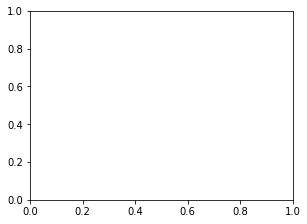

In [4]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(data['age'],shade=True,label=' Age')
# plt.title ('Distribution of Age')
plt.legend()
fig = plt.subplot(432)
data['sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')
# plt.title ('Distribution of sex')
plt.legend()
fig = plt.subplot(433)
data['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
# plt.title ('Distribution of chest pain')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.distplot(data['trtbps'], color="red",  kde= True,label='Blood Pressure')
# plt.title ('Distribution of blood pressure')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(data['chol'],shade=True,label='cholestrol')
# plt.title ('Distribution of cholestrol')
plt.legend()
fig = plt.subplot(436)
data['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')
# plt.title ('Distribution of blood sugar')
plt.legend()
fig = plt.subplot(437)
data['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('restecg')
# plt.title ('Distribution of electrocardiographic result')
plt.legend()
fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Maximum heart rate')
sns.distplot(data['thalachh'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()
fig = plt.subplot(439)
data['exng'].value_counts().plot(kind='bar',label='Induced engina', color="grey")
plt.xlabel('exng')
# plt.title ('Distribution of induced engina')
plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(data['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
data['slp'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slp')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
data['caa'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('caa')
# plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

Most of the people have age between 50-60,less chest pain,blood pressure between 120 to 140,cholestrol between 200-300,blodd sugar less than 120 and are mail whereas heart rate between 150-175.

# **Distribution of Features w.r.t Heart Disease**

In [5]:
heart = data[data['output']==1]['age'].fillna(0.0).astype(float)
heart_no = data[data['output']==0]['age'].fillna(0.0).astype(float)
fi = ff.create_distplot([heart, heart_no], ['Hear Disease','No Heart Disease'], bin_size=0.65, curve_type='normal'
                        ,colors =  ['#E50914','#221F1F'])
fi.update_layout(
    title="Heart Attack distibution over age",
    xaxis_title="Age",
)
fi.show()
heart = data[data['output']==1]['thalachh'].fillna(0.0).astype(float)
heart_no = data[data['output']==0]['thalachh'].fillna(0.0).astype(float)
fi = ff.create_distplot([heart, heart_no], ['Hear Disease','No Heart Disease'], bin_size=0.65, curve_type='normal'
                        ,colors =  ['#E50914','green'])
fi.update_layout(
    title="Heart Attack distibution over Heart rate",
    xaxis_title="Heart Rate",
)
fi.show()

NameError: name 'data' is not defined

 People having age 40-60 are more likely to have heart disease whereas people having higher heart rate are very much probable to suffer from heart attack.

NameError: name 'data' is not defined

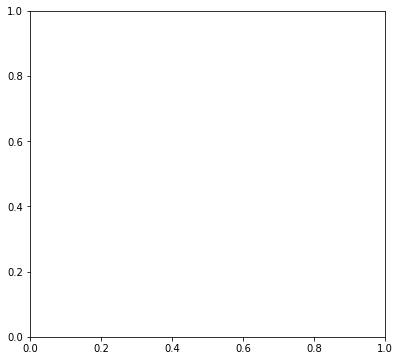

In [6]:
fig=plt.figure(figsize=(14, 6))
fig = plt.subplot(121)
sns.distplot(data[data['output'] == 0]["chol"], color='green',label='No heart Disease') 
sns.distplot(data[data['output'] == 1]["chol"], color='red',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distibution over Cholestrol ', fontsize=15)
plt.legend()
# plt.show()
fig = plt.subplot(122)
sns.distplot(data[data['output'] == 0]["trtbps"], color='green',label='No heart Disease') 
sns.distplot(data[data['output'] == 1]["trtbps"], color='red',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distibution over Blood pressure ', fontsize=15)
plt.legend()

People having cholestrol 120-250 and blood between 110 to 140 are more likely to have heart attack.

NameError: name 'data' is not defined

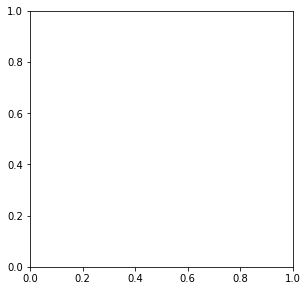

In [7]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(331)
df=data
name='sex'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["male","female"]
plt.bar(x,l,label=name )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
fig = plt.subplot(332)
df=data
name='cp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='chest pain' , color="pink")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(333)
name='fbs'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='Blood sugar', color="grey" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
fig = plt.subplot(334)
name='restecg'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='electrocardiographic' , color="grey")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(335)
name='exng'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='exercise induced angina' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
fig = plt.subplot(336)
name='slp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
     (100)*df[df[name]==2]['output'].sum()/len(df[df[name]==2]['output'])]
x=["0","1",'2']
plt.bar(x,l,label='Slope' , color="brown")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(337)
df=data
name='caa'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='number of major vessels' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(338)
df=data
name='thall'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='Thal rate', color="pink" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart v')
plt.legend()

73% of male suffers from heart attack whereas only 45% of female suffer from heart attack so males are more likely to suffer from it.

People having chest pain are highly probably to suffer from heart attack.

Blood sugar doesnot have that much impact on heart attack i.e. person having heart attack is independent of whether person have blood sugar or not.

Person doesnot having exercied indeced enginal are higly probable to suffer from heart attack.

# **Distribution of attribute w.r.t other attribute having hue=Heart Attack**

NameError: name 'data' is not defined

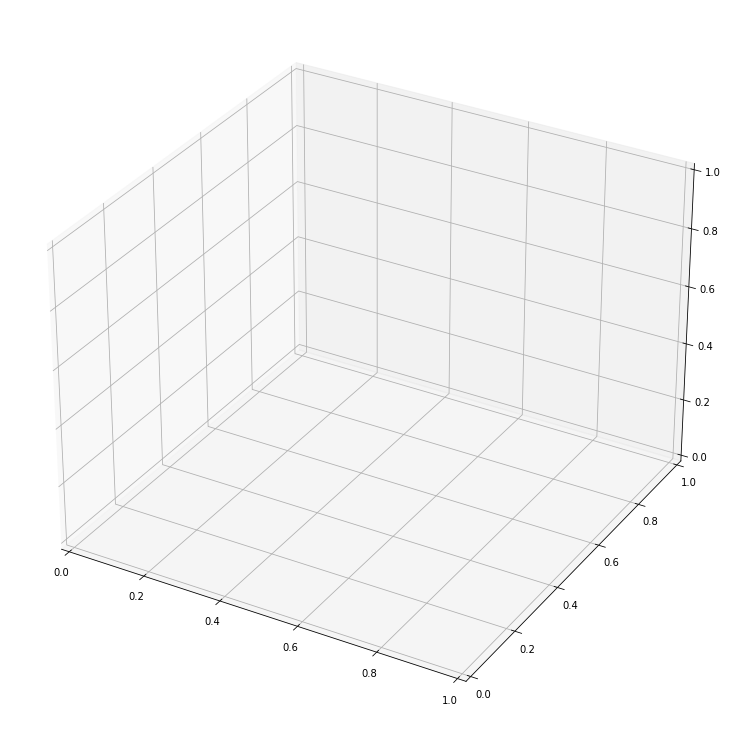

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(data["output"], data["thalachh"],data["age"],  c="red", s=20, alpha=0.5)
plt.xlabel('Heart Attack')
plt.ylabel('Heart Rate')
plt.show()

Peoplle having higher heart rate are highly likely to suffer from heart attack though age desnot contributes.

In [9]:
sns.catplot(x="cp", y="thalachh",hue='output' ,kind="box", data=data)

NameError: name 'data' is not defined

Higher the chest pain and higher the heart, very likely is person to suffer from heart attack.

In [10]:
sns.catplot(data=data, x="exng", y="age", hue='output',aspect=1.7,kind="swarm")

NameError: name 'data' is not defined

People having low exercise induced angina are more probable to suffer from heart disease although age doesnot contribute as much to heart attack.

# **Correlation among attributes**

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap="Blues")


NameError: name 'data' is not defined

<Figure size 1080x576 with 0 Axes>

In [12]:
data.corr()

NameError: name 'data' is not defined

As we can see from the above graph and table, heart attack have positive correlation with chest pain,heart rateand slope whereas have negative correlation age, induced engina and major vessels.